# 🦠 COVID-19 Global Data Tracker

Welcome to the COVID-19 Global Data Tracker Project!

This notebook will walk through data loading, cleaning, exploratory analysis, and visualization of global COVID-19 data using Python.

## Step 1: Data Collection
We are using the `owid-covid-data.csv` dataset from [Our World in Data](https://ourworldindata.org/coronavirus-source-data).

In [1]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# 🧾 View the first few rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## 🧹 Step 2: Data Cleaning

✅ Goal:
Prepare the COVID-19 dataset for meaningful analysis.

In [2]:
# 🌍 Focus on selected countries
countries = ["Kenya", "United States", "India"]
df = df[df['location'].isin(countries)]

# 📅 Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# 🧹 Drop rows with missing date or critical metrics
df.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# 🔧 Fill or interpolate remaining numeric missing values
df[['new_cases', 'new_deaths', 'total_vaccinations']] = df[[
    'new_cases', 'new_deaths', 'total_vaccinations'
]].fillna(0)

# ✅ Preview cleaned data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 139843 to 330865
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    3944 non-null   object        
 1   continent                                   3944 non-null   object        
 2   location                                    3944 non-null   object        
 3   date                                        3944 non-null   datetime64[ns]
 4   total_cases                                 3944 non-null   float64       
 5   new_cases                                   3944 non-null   float64       
 6   new_cases_smoothed                          3792 non-null   float64       
 7   total_deaths                                3944 non-null   float64       
 8   new_deaths                                  3944 non-null   float64       
 9   new_de

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139843,IND,Asia,India,2020-03-13,81.0,8.0,7.143,1.0,1.0,0.143,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139844,IND,Asia,India,2020-03-14,84.0,3.0,7.143,2.0,1.0,0.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139845,IND,Asia,India,2020-03-15,107.0,23.0,9.714,2.0,0.0,0.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139846,IND,Asia,India,2020-03-16,114.0,7.0,10.000,2.0,0.0,0.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139847,IND,Asia,India,2020-03-17,137.0,23.0,12.429,3.0,1.0,0.429,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


## 📊 Step 3: Exploratory Data Analysis (EDA)
🎯 Goal:
Explore trends and patterns in cases and deaths over time for selected countries.

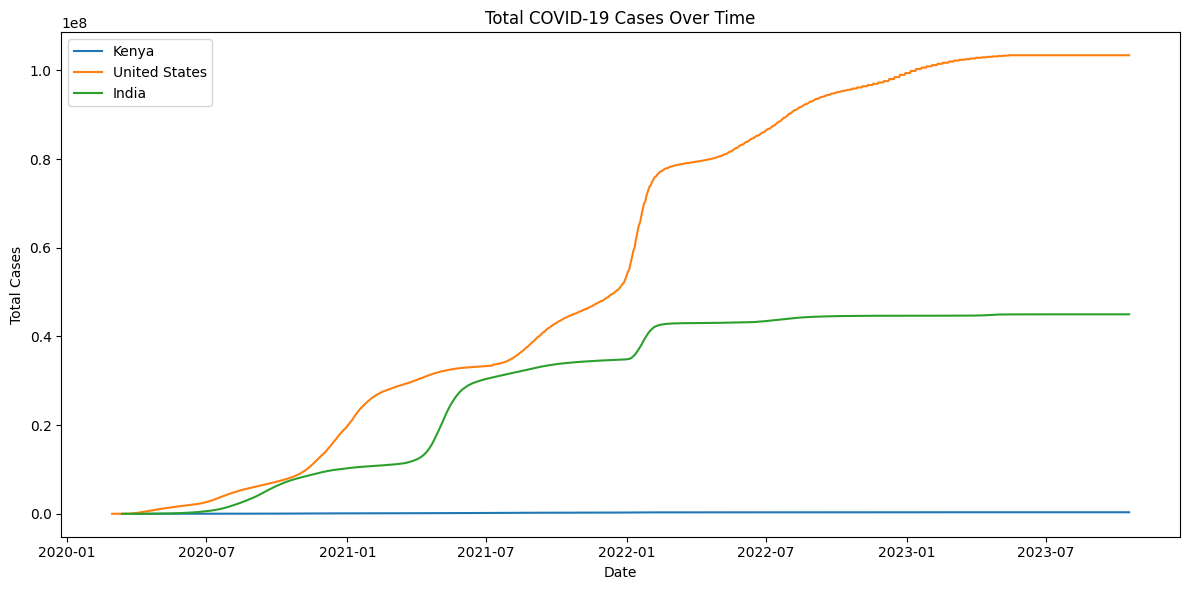

In [3]:
# 📈 Total COVID-19 Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


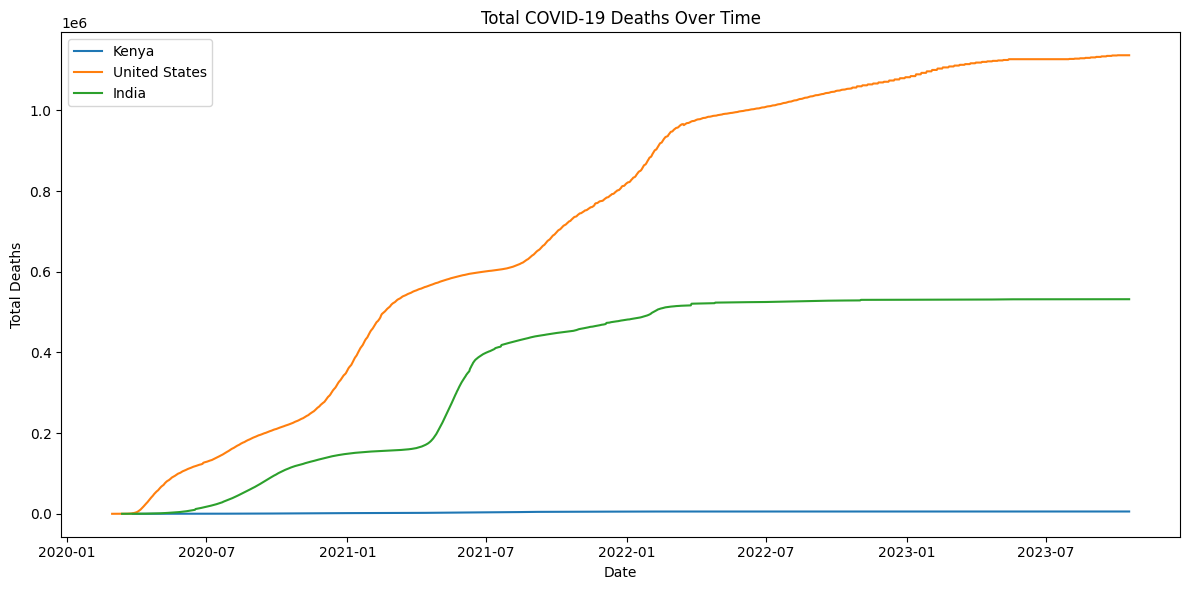

In [4]:
# ⚰️ Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


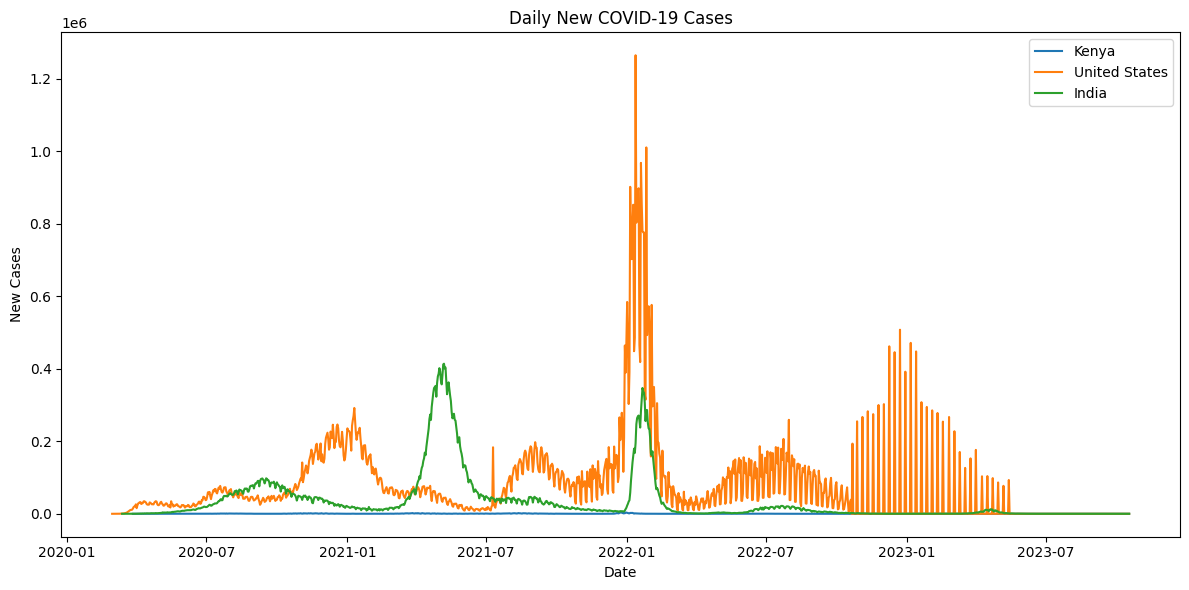

In [5]:
# 🔄 Daily New Cases Comparison
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


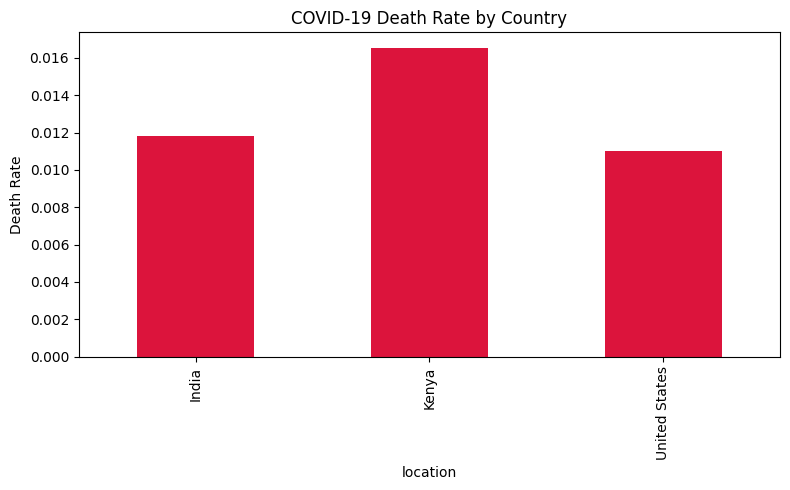

In [6]:
# ☠️ Death Rate = total_deaths / total_cases
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Average death rate per country (final date values)
death_rates = df.groupby('location')['death_rate'].last()

# 📊 Bar Chart of Death Rates
death_rates.plot(kind='bar', figsize=(8, 5), color='crimson', title='COVID-19 Death Rate by Country')
plt.ylabel('Death Rate')
plt.tight_layout()
plt.show()


## 💉 Step 4: Visualizing Vaccination Progress
🎯 Goal:
Analyze and compare how vaccinations progressed in different countries.

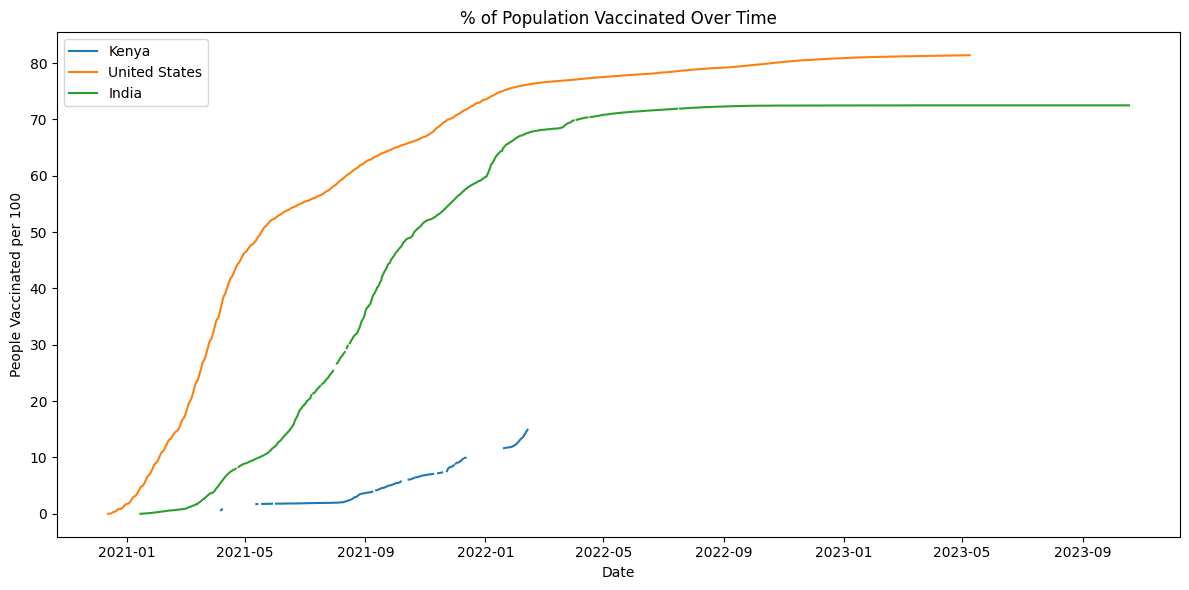

In [7]:
# 📊 % of people vaccinated (if column exists)
if 'people_vaccinated_per_hundred' in df.columns:
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = df[df['location'] == country]
        plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

    plt.title('% of Population Vaccinated Over Time')
    plt.xlabel('Date')
    plt.ylabel('People Vaccinated per 100')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'people_vaccinated_per_hundred' not found in dataset.")


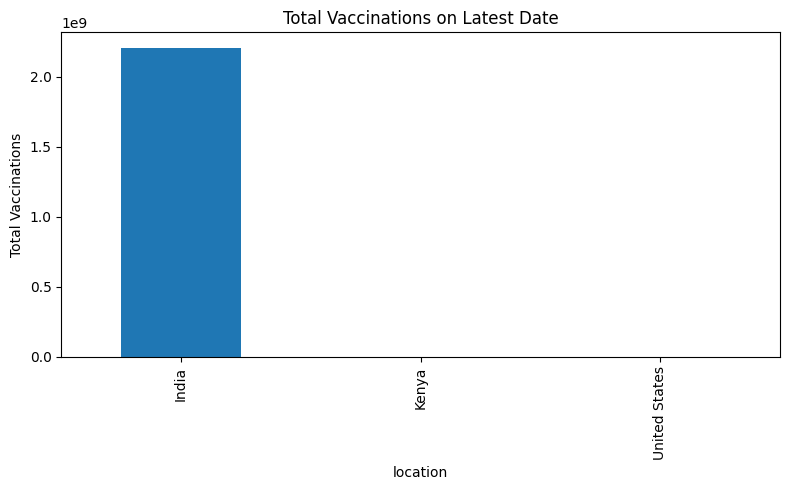

In [8]:
# 📅 Latest vaccination counts
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date][['location', 'total_vaccinations']].set_index('location')

# Bar chart
latest_data.plot(kind='bar', figsize=(8, 5), legend=False, title='Total Vaccinations on Latest Date')
plt.ylabel('Total Vaccinations')
plt.tight_layout()
plt.show()


## 🗺️ Step 5: Optional — Build a Choropleth Map

In [ ]:
! pip install plotly

In [ ]:
# 🗓️ Filter to latest date
latest_df = df[df['date'] == df['date'].max()]

# 📊 Select iso_code and desired metrics
map_df = latest_df[['iso_code', 'location', 'total_cases', 'total_vaccinations']].dropna()

import plotly.express as px

# 🌍 Choropleth Map: Total Cases
fig = px.choropleth(
    map_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Total COVID-19 Cases by Country (Latest Date)'
)
fig.show()


## 🧠 Step 7: Insights & Reporting

### Key Insights

- 🇺🇸 The United States had the highest cumulative case count overall, followed by India.
- 🇮🇳 India showed sharp spikes in daily cases in mid-2021, likely linked to the Delta variant.
- 🇰🇪 Kenya's case trend was lower overall but had multiple small waves, peaking around July 2021.
- 💉 Vaccination rates rose steadily after early 2021; the US showed the fastest rollout among selected countries.
- ☠️ Death rate remained under 2% globally but was higher during initial waves before vaccines became available.
